In [2]:
import numpy as np
import matplotlib.pyplot as plt

## **Example 1**

- Using $x - \mu$ to standardize the data.

- In this example, we are using **2D** data with **8** features.
- We will convert this data to **1D** with **k** features.
- After that, we will **reconstruct our original data using the PCA components**.


$$\begin{bmatrix} & f1 & f2 & f3 & f4 & f5 & f6 & f7 & f8 \\ x & 1.00 & 1.00 & 2.00 & 0.00 & 5.00 & 4.00 & 5.00 & 3.00 \\ y & 3.00 & 2.00 & 3.00 & 3.00 & 4.00 & 5.00 & 5.00 & 4.00 \end{bmatrix}$$

--------------------------------------------------------------------------------


## 1.1. Given data :: 

Shape of given data :: (2, 8)
Data in A :: 
[[1. 1. 2. 0. 5. 4. 5. 3.]
 [3. 2. 3. 3. 4. 5. 5. 4.]]



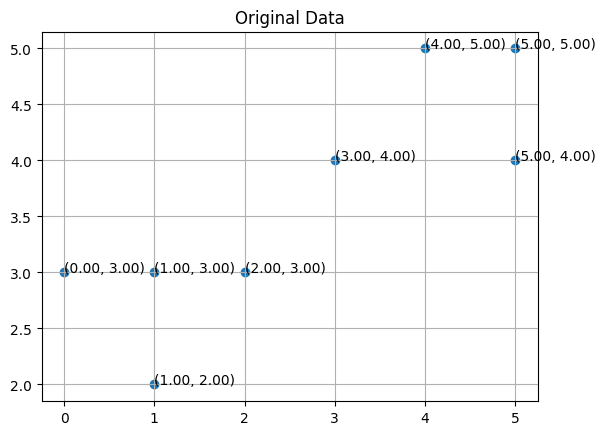

In [3]:
# 1.1. Given data
print('-'*80)
print("\n\n## 1.1. Given data :: \n")
# Inserting given values in np array, A.
# Entering value row wise.

#################################################################################
A = np.array([1.0,1.0,2.0,0.0,5.0,4.0,5.0,3.0, 3.0,2.0,3.0,3.0,4.0,5.0,5.0,4.0])

# Changing shape of a according to given data.
A = A.reshape(2,8)

# Will use this for reference for plots only
original_data = A.copy()

#################################################################################
print(f"Shape of given data :: {A.shape}")
print("Data in A :: ")
print(A,end='\n\n')

plt.scatter(A[0, :], A[1, :])
plt.title('Original Data')
plt.grid()

for coords in zip(A[0,:], A[1,:]):
    plt.annotate('(%.2f, %.2f)' %coords, coords)

plt.show()

--------------------------------------------------------------------------------
Mean of x: 2.625
Mean of y: 3.625


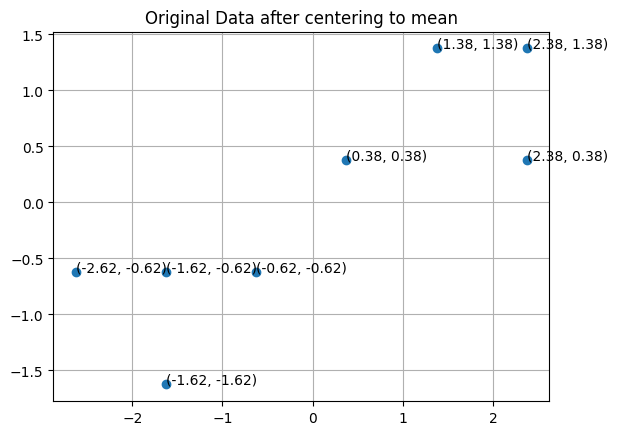

In [4]:
# 1.2. Calculating Mean
print('-'*80)
# print("\n\n## 1.2. Calculating mean :: \n")

x_mean = np.mean(A[0,:])
y_mean = np.mean(A[1,:])

mean_col = [x_mean, y_mean]

print(f"Mean of x: {x_mean}")
print(f"Mean of y: {y_mean}")

A[0,:] = A[0,:] - x_mean
A[1,:] = A[1,:] - y_mean


plt.scatter(A[0, :], A[1, :])
plt.title('Original Data after centering to mean')

for coords in zip(A[0,:], A[1,:]):
    plt.annotate('(%.2f, %.2f)' %coords, coords)

plt.grid()
plt.show()

In [8]:
# 1.3. Calculating Covariance matrix
print('-'*80)
print("\n\n## 1.3. Calculating covariance matrix :: \n")

A_transpose = A.T
print("Matrix A_transpose ::")
print(f"Shape of A_transpose = {A_transpose.shape}")
print("Data in A_transpose :: ")
print(A_transpose,end='\n\n')

print("Matrix A ::")
print(f"Shape of A = {A.shape}")
print("Data in A :: ")
print(A,end='\n\n')

print("Covariance Matrix = A_transpose . A ")
#################################################################################
covar_matrix = A.dot(A_transpose)/A.shape[1]

#################################################################################
print(f"Shape of covariance matrix = {covar_matrix.shape}")
print("Data in covariance matrix :: ")
print(covar_matrix,end='\n\n')


--------------------------------------------------------------------------------


## 1.3. Calculating covariance matrix :: 

Matrix A_transpose ::
Shape of A_transpose = (8, 2)
Data in A_transpose :: 
[[-1.625 -0.625]
 [-1.625 -1.625]
 [-0.625 -0.625]
 [-2.625 -0.625]
 [ 2.375  0.375]
 [ 1.375  1.375]
 [ 2.375  1.375]
 [ 0.375  0.375]]

Matrix A ::
Shape of A = (2, 8)
Data in A :: 
[[-1.625 -1.625 -0.625 -2.625  2.375  1.375  2.375  0.375]
 [-0.625 -1.625 -0.625 -0.625  0.375  1.375  1.375  0.375]]

Covariance Matrix = A_transpose . A 
Shape of covariance matrix = (2, 2)
Data in covariance matrix :: 
[[3.234375 1.484375]
 [1.484375 0.984375]]



In [9]:
# 1.4. Eingenvalues and Eigenvectors of covariance matrix
print('-'*80)
print("\n\n## 1.4. Eingenvalues and Eigenvectors of covariance matrix :: \n")
eigenvalues, eigenvectors = np.linalg.eig(covar_matrix)
eigenvectors = eigenvectors.T

# Sorting eigenvalues and corresponding eigenvectors in decreasing order
index = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[index]


print("Eigenvalues in decreasing order :: ")
for i,value in enumerate(eigenvalues):
    print(f"\tLambda_{i+1} = {value}")

print('\nEigenvectors corresponding to eigenvalues :: ')

for i,value in enumerate(eigenvalues):
    print(f"\n\tLambda_{i+1} = {value} :: \n\tEigenvector = {eigenvectors[i]}")

--------------------------------------------------------------------------------


## 1.4. Eingenvalues and Eigenvectors of covariance matrix :: 

Eigenvalues in decreasing order :: 
	Lambda_1 = 3.971898594649206
	Lambda_2 = 0.24685140535079392

Eigenvectors corresponding to eigenvalues :: 

	Lambda_1 = 3.971898594649206 :: 
	Eigenvector = [0.89554989 0.44496113]

	Lambda_2 = 0.24685140535079392 :: 
	Eigenvector = [-0.44496113  0.89554989]


--------------------------------------------------------------------------------


## 1.5. Principal components :: 

####################################################################################################

	1 principal component = [0.89554989 0.44496113]

	2 principal component = [-0.44496113  0.89554989]
####################################################################################################


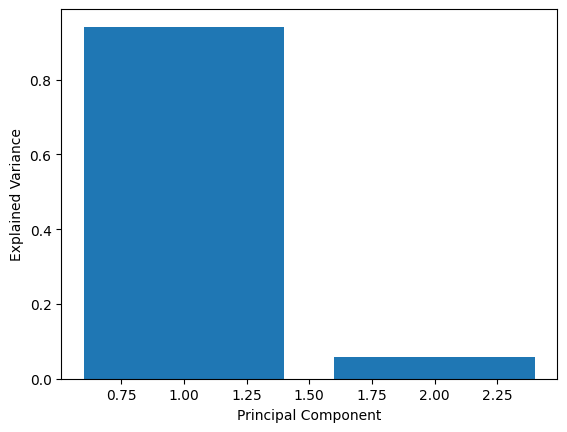

This plot shows that our Principal component 1 is able to capture the overall information.
 As we are running this on sample data, we are getting high value of Explained Variance.


In [10]:
# 1.5. Principal components

print('-'*80)
print("\n\n## 1.5. Principal components :: \n")
print('#'*100)

for i,value in enumerate(eigenvalues):
  # if float('{:f}'.format(value)) != 0.0:
  print(f"\n\t{i+1} principal component = {np.round(eigenvectors[i], 8)}")
print('#'*100)


exp_var_pca = eigenvalues/sum(eigenvalues)
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

print("This plot shows that our Principal component 1 is able to capture the overall information.\n \
As we are running this on sample data, we are getting high value of Explained Variance.")


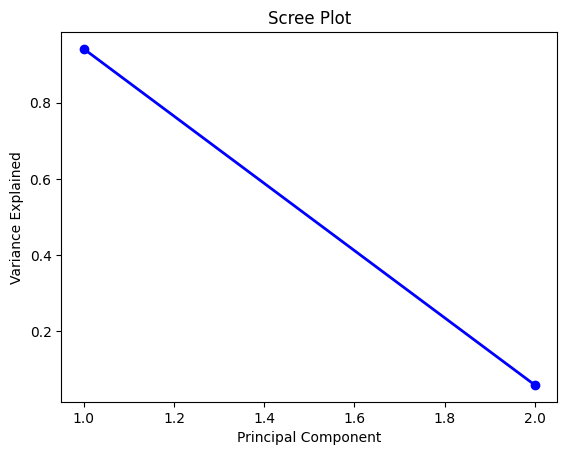

This plot tells us the percentage of variation explained by each principal component.


In [11]:
PC_values = np.arange(2) + 1
plt.plot(PC_values, exp_var_pca, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print("This plot tells us the percentage of variation explained by each principal component.")

--------------------------------------------------------------------------------


## 1.6. Projected data using k=1 :: 

Shape of PCA using k = 1 = (1, 2)
Data in PCA using k = 1 :: 
[[0.89554989 0.44496113]]


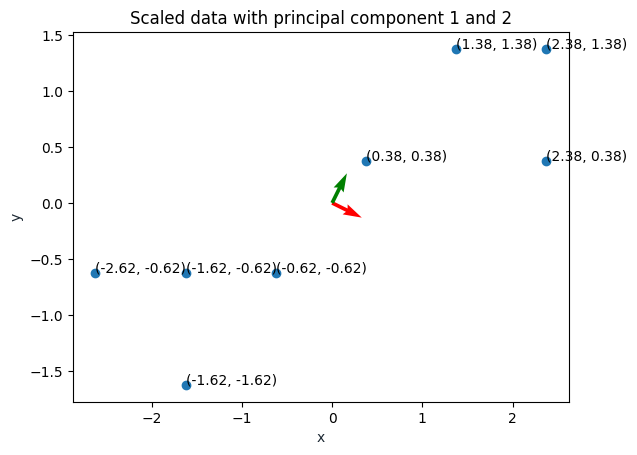


Projected data using PCA :: 
Shape of projected_data =  (1, 8)
Data in projected_data :: 
[[-1.73336927 -2.17833039 -0.83781938 -2.62891915  2.2937914   1.84320264
   2.73875252  0.50269163]]

 We have reduced the dimension from (2, 8) to (1, 8) using PCA.


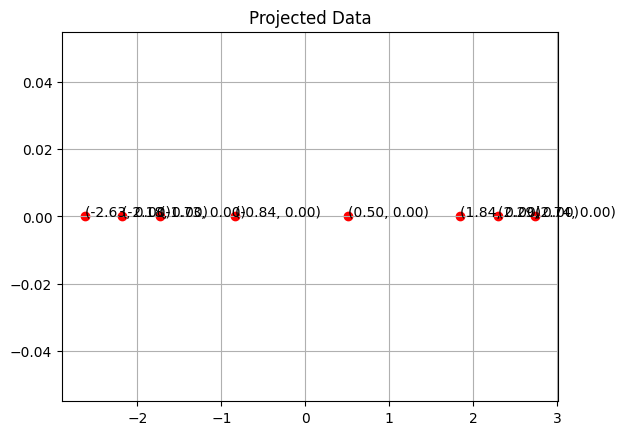

In [12]:
# 1.6. Projected data using k
print('-'*80)

k = 1

print(f"\n\n## 1.6. Projected data using k={k} :: \n")
pca = eigenvectors[:k]
print(f"Shape of PCA using k = {k} = {pca.shape}")
print(f"Data in PCA using k = {k} :: ")
print(pca)

# Ploting principal component on our scaled data



plt.scatter(A[0, :], A[1, :])
plt.title('Scaled data with principal component 1 and 2')

for coords in zip(A[0,:], A[1,:]):
    plt.annotate('(%.2f, %.2f)' %coords, coords)

plt.grid()

origin = [0, 0]

eig_vec1 = eigenvectors[:,0]
eig_vec2 = eigenvectors[:,1]

plt.quiver(*origin, *eig_vec1, color=['r'], scale=15)
plt.quiver(*origin, *eig_vec2, color=['g'], scale=15)


plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')

plt.grid()
plt.show()

print("\nProjected data using PCA :: ")
projected_data = pca.dot(A)
print(f"Shape of projected_data =  {projected_data.shape}")
print("Data in projected_data :: ")
print(projected_data)

print(f"\n We have reduced the dimension from {A.shape} to {projected_data.shape} using PCA.")


plt.scatter(projected_data[0,:], np.zeros(projected_data.shape[1]), c='r')
plt.title('Projected Data')
plt.grid()

for coords in zip(projected_data[0,:], np.zeros(projected_data.shape[1])):
    plt.annotate('(%.2f, %.2f)' %coords, coords)

plt.show()

--------------------------------------------------------------------------------


## 1.7. Reconstructing original data using PCA :: 

Shape of PCA using k = 1 = (1, 2)
Data in PCA using k = 1 :: 
[[0.89554989 0.44496113]]

Projected data using PCA [k=1] :: 
Shape of projected_data =  (1, 8)
Data in projected_data :: 
[[-1.73336927 -2.17833039 -0.83781938 -2.62891915  2.2937914   1.84320264
   2.73875252  0.50269163]]

Constructing original data using equation mentioned above :: 

[[1.07268135 0.67419647 1.87469095 0.27067176 4.67920462 4.27567991
  5.07768951 3.07518543]
 [2.85371806 2.65572766 3.25220295 2.45523318 4.645648   4.44515352
  4.84363841 3.84867823]]

Rounding constructed data for better visualization :: 

[[1. 1. 2. 0. 5. 4. 5. 3.]
 [3. 3. 3. 2. 5. 4. 5. 4.]]


We get the almost same values after rounding off the constructed data. 
It means that we are able to capture the original data by reducing the dimensions using PCA.


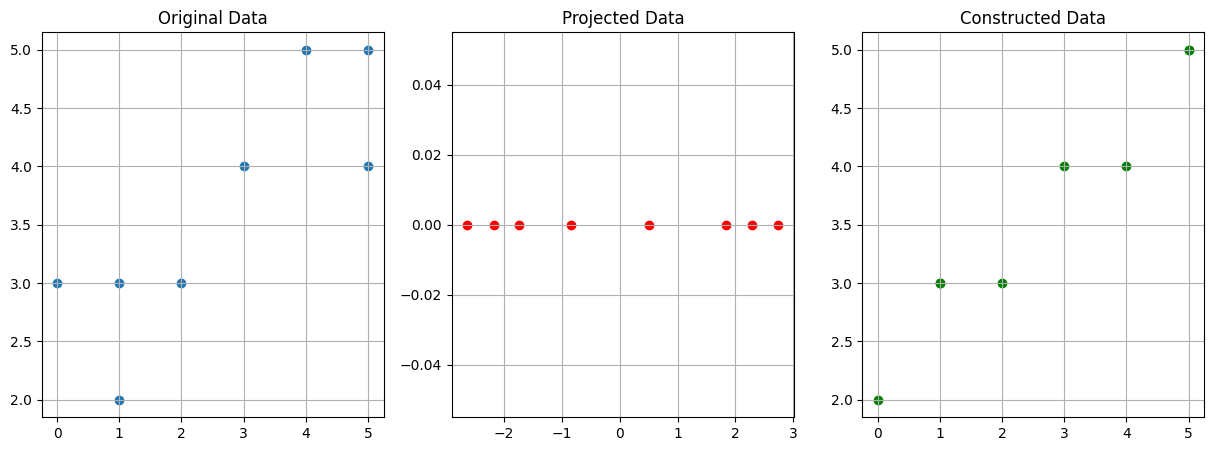

In [13]:
# 1.7. Reconstructing original data using PCA
print('-'*80)
print("\n\n## 1.7. Reconstructing original data using PCA :: \n")

k=1

pca_1 = eigenvectors[:k]
print(f"Shape of PCA using k = {k} = {pca_1.shape}")
print(f"Data in PCA using k = {k} :: ")
print(pca_1)


print(f"\nProjected data using PCA [k={k}] :: ")
projected_data = pca_1.dot(A)
print(f"Shape of projected_data =  {projected_data.shape}")
print("Data in projected_data :: ")
print(projected_data)


print("\nConstructing original data using equation mentioned above :: \n")
constructed_data = pca_1.T.dot(projected_data)

for col in range(constructed_data.shape[0]):
    constructed_data[col,:] = constructed_data[col,:] + mean_col[col]
print(constructed_data)


print("\nRounding constructed data for better visualization :: \n")
constructed_data = np.round(constructed_data)
print(constructed_data)

print("\n\nWe get the almost same values after rounding off the constructed data. \nIt means that we are able to capture the original data by reducing the dimensions using PCA.")


fig, ax = plt.subplots(1, 3, figsize=(15, 5))



ax[0].scatter(original_data[0, :], original_data[1, :])
ax[0].set_title('Original Data')
# for coords in zip(original_data[0,:], original_data[1,:]):
#     ax[0].annotate('(%.2f, %.2f)' %coords, coords,size=10)
ax[0].grid()

ax[1].scatter(projected_data[0, :], np.zeros(projected_data.shape[1]), color='r')
ax[1].set_title('Projected Data')
# for coords in zip(projected_data[0,:], np.zeros(projected_data.shape[1])):
#     ax[1].annotate('(%.2f, %.2f)' %coords, coords, size=10)
ax[1].grid()


ax[2].scatter(constructed_data[0, :], constructed_data[1, :], color='g')
ax[2].set_title('Constructed Data')
# for coords in zip(constructed_data[0,:], constructed_data[1,:]):
#     ax[2].annotate('(%.2f, %.2f)' %coords, coords,size=10)
ax[2].grid()

plt.show()